In [1]:
import matplotlib.pyplot as plt
from skimage import *
import numpy as np
from skimage.viewer import ImageViewer
from tifffile import * 
import matplotlib.patches as mpatches 
from skimage import io

In [2]:
red =io.imread('test_images_tiff/B4.tif')
nir = io.imread('test_images_tiff/B5.tif')

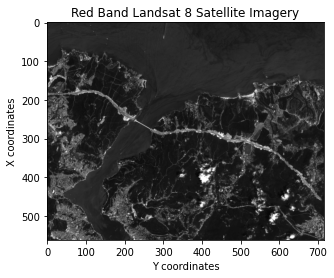

In [3]:
#red
plt.title("Red Band Landsat 8 Satellite Imagery")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(red)

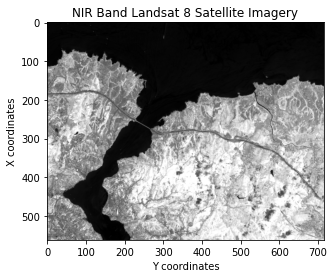

In [4]:
#nir
plt.title("NIR Band Landsat 8 Satellite Imagery")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(nir)

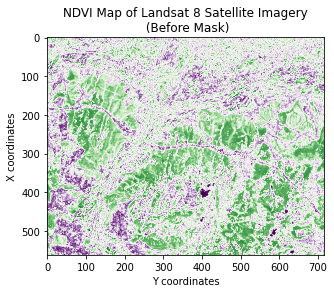

In [5]:
#import create_ndvi function in order to calculate ndvi
from utils import create_ndvi
ndvi=create_ndvi(nir_band=nir,red_band=red)
ndvi_in_uint = (ndvi*255).astype('uint8')
ndvi_before_mask=ndvi_in_uint[:,:,1]
plt.title("NDVI Map of Landsat 8 Satellite Imagery\n (Before Mask)")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(ndvi_before_mask,cmap='PRGn',vmin=0,vmax=255)

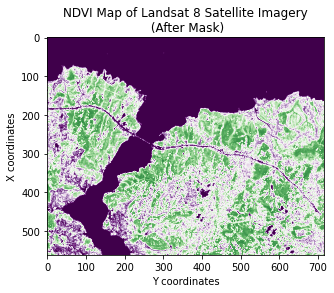

In [6]:
#import mask function in order to mask water bodies
from utils import water_mask_ndvi

img = water_mask_ndvi(ndvi_band=ndvi,nir_band=nir)
plt.title("NDVI Map of Landsat 8 Satellite Imagery\n (After Mask)")
plt.xlabel("Y coordinates")
plt.ylabel("X coordinates")
plt.imshow(img,cmap='PRGn',vmin=0,vmax=255)
plt.savefig('outputs/NDVI.png',format="png")